In [75]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.graph_objects as go
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [76]:


df_seq_pathHFiltNorm = 'HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt'
df_seq_HFiltNorm = pd.read_csv(df_seq_pathHFiltNorm, delimiter=' ')
data_scaled = pd.DataFrame(StandardScaler().fit_transform(df_seq_HFiltNorm), columns=df_seq_HFiltNorm.columns)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)
str_labels = [str(label) for label in cluster_labels]
# centroids = kmeans.cluster_centers_

# Perform PCA to reduce the data to 3 dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

# Create DataFrame for clustered data
df_clustered = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'PC3': pca_result[:, 2],
    'Cluster': str_labels
})

# Plot 
fig = px.scatter_3d(df_clustered, x='PC1', y='PC2', z='PC3', color='Cluster',
                     symbol='Cluster', opacity=0.7, size_max=10,
                     title='KMeans Clustering in 3D with PCA')

fig.show()





/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



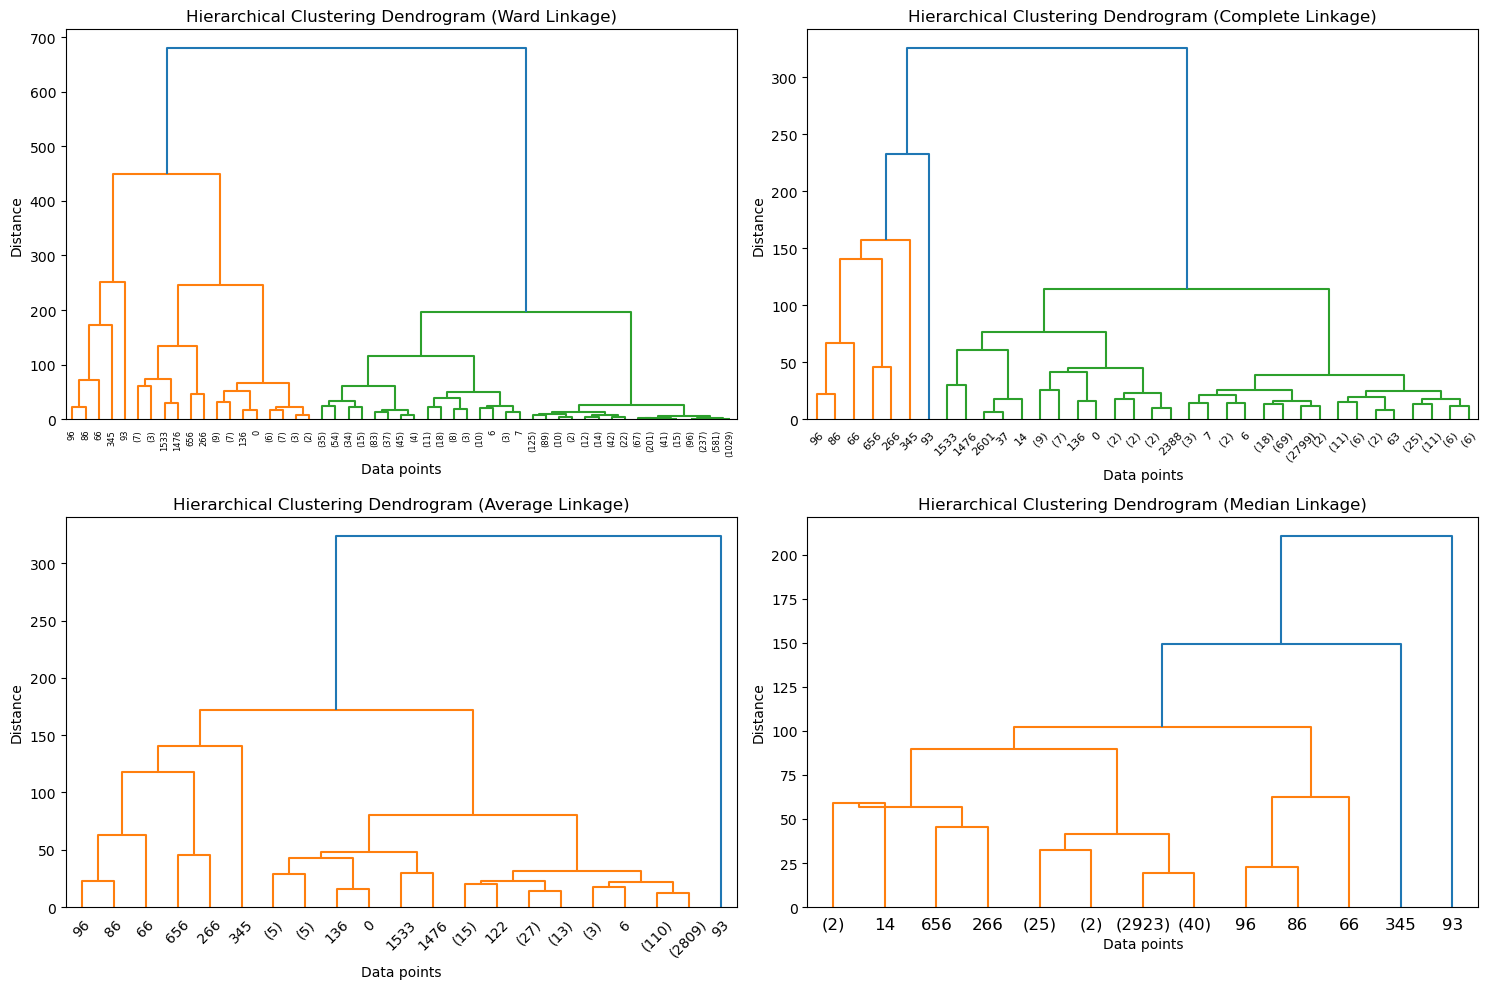

In [83]:
# Define linkage methods
methods = ['ward', 'complete', 'average', 'median']

# Plot dendrograms for each linkage method
plt.figure(figsize=(15, 10))
for i, method in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    linked = linkage(pca_result, method=method)
    dendrogram(linked, distance_sort='descending', truncate_mode='level', p=5)
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Data points')
    plt.ylabel('Distance')

  
plt.tight_layout()
plt.show()


we clearly see that the ward method is the most effficent since it gives use 2 main clusters and a third one, which probably contains outliers.
we then proceed plotting the clusters we found thanks to this method.

In [79]:


# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
model.fit(data_scaled)
model_labels = [str(label) for label in model.labels_]


# Calculate cluster means
cluster_means = []
for i in range(model.n_clusters_):
    cluster_means.append(df_seq_HFiltNorm[model.labels_ == i].mean())

# Perform PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(data_scaled)

# Create DataFrame for clustered data
df_clustered = pd.DataFrame({
    'PC1': pca_data[:, 0],
    'PC2': pca_data[:, 1],
    'PC3': pca_data[:, 2],
    'Cluster': model_labels
})

# Plot with Plotly Express
fig = px.scatter_3d(df_clustered, x='PC1', y='PC2', z='PC3', color='Cluster',
                    opacity=0.7, size_max=10,
                    title='PCA of clustered data')

# # Add annotations for legend
# for i, mean in enumerate(cluster_means):
#     fig.add_annotation(x=mean[0], y=mean[1], z=mean[2],
#                        text=f'Cluster {i+1}',
#                        showarrow=False,
#                        font=dict(color=sns.color_palette("Set1", n_colors=4)[i]))

fig.show()
